【臺北大學】Python程式設計<br>
【授課老師】[陳祥輝 (Email : HsiangHui.Chen@gmail.com)](mailto:HsiangHui.Chen@gmail.com)<br>
【facebook】[陳祥輝老師的臉書 (歡迎加好友)](https://goo.gl/osivhx)<br>
【參考書籍】[從零開始學Python程式設計（適用Python 3.5以上）](http://www.drmaster.com.tw/Bookinfo.asp?BookID=MP31821)<br>
【主要議題】使用者自定義函數(UDF)、模組(Module)與套件(Package)

【重點提要】

----

* formal parameter (形式參數): 定義在函數名稱後面括弧( )內的
* actual parameter(argument) (實際引數、參數) : 呼叫函數時括弧( )內的

----

* anonymous function(匿名函數) (lambda)

----

* call by value
* call by reference

----

* default paramenter values (預設參數值): 一定要放在最右邊
* positional argument (位置引數)
* keyword argument    (關鍵引數)

----

* (\*args) 運算子，使用在formal parameter & acutal parameter。也就是『位置引數』(positional argument)
* (\**kwargs) 運算子，使用在formal parameter & acutal parameter。也就是『關鍵引數』(keyword argument)

----

* 傳遞函數名稱，也就是將函數當成參數傳遞
* 遞迴(Recursive)
    1. 找出一般式
    2. 迴傳 本層可以處理的部分 結合 不能處理的部分(給下一個自己處理)
    3. 找出何時停止，也就是沒有下一層

In [1]:
# -*-coding:UTF-8-*- 
from platform import python_version
import os, time, glob, socket, sys

print("【日期時間】{}".format(time.strftime("%Y/%m/%d %H:%M:%S")))
print("【主機名稱】{} ({})".format(socket.gethostname(),socket.gethostbyname(socket.gethostname())))
print("【工作目錄】{}".format(os.getcwd()))
print("【Python】{}".format(python_version()))
print("【預設遞迴深度】{}".format(sys.getrecursionlimit()))

%autosave 120

【日期時間】2021/06/01 13:47:27
【主機名稱】DESKTOP-AQAMOD2 (192.168.43.47)
【工作目錄】C:\Users\amy10\Desktop\Course\1092python
【Python】3.8.5
【預設遞迴深度】3000


Autosaving every 120 seconds


## <font color=#0000FF>使用者自定義函數 (User-Defined Functions, UDF)</font>
return 有兩個意義
- 將`執行權`交回給主程式
- 將執行的`結果`傳回主程式

In [2]:
def myOper(x, y):
    a = x + y
    return a

In [3]:
myOper(3, 5)

8

In [5]:
def myOper2(x, y):
    a = x + y
    b = x - y
    c = x * y
    d = x / y
    return a, b, c, d

In [6]:
myOper2(10, 5)

(15, 5, 50, 2.0)

In [7]:
m, n, o, p = myOper2(13000, 5)
print(f'm={m:,}, n={n}, o={o}, p={p:.2f}')

m=13,005, n=12995, o=65000, p=2600.00


以下發生的錯誤，是因為指定數目與回傳數目不相等，在往下會做說明

In [8]:
m, n, o= myOper2(13000, 5)
print(f'm={m:,}, n={n}, o={o}')

ValueError: too many values to unpack (expected 3)

## <font color=#0000FF>匿名函數 (lambda)</font>
【使用時機】
- 簡單運算
- 只使用一次

In [9]:
def add(x, y):
    return x**2 + y**2

In [12]:
add

<function __main__.add(x, y)>

In [10]:
add(10, 20)

500

In [13]:
(lambda x, y : x**2 + y**2)

<function __main__.<lambda>(x, y)>

In [11]:
(lambda x, y : x**2 + y**2)(10, 20)

500

<font size=4>如何排序 dict 物件</font>

In [14]:
d = {'x':10, 'z':5, 'y':12, 'a':60, 'd':50}
print(len(d))
print('a' in d)

5
True


In [15]:
d.items()

dict_items([('x', 10), ('z', 5), ('y', 12), ('a', 60), ('d', 50)])

In [16]:
sorted(d.items(), key=lambda x:x[0], reverse=False)

[('a', 60), ('d', 50), ('x', 10), ('y', 12), ('z', 5)]

In [17]:
sorted(d.items(), key=lambda x:x[1], reverse=False)

[('z', 5), ('x', 10), ('y', 12), ('d', 50), ('a', 60)]

In [18]:
def sortByKey(x) :
    return x[0]

In [19]:
def sortByValue(x) :
    return x[1]

In [20]:
sorted(d.items(), key=sortByKey, reverse=False)

[('a', 60), ('d', 50), ('x', 10), ('y', 12), ('z', 5)]

In [21]:
sorted(d.items(), key=sortByValue, reverse=False)

[('z', 5), ('x', 10), ('y', 12), ('d', 50), ('a', 60)]

## <font color=#0000FF>Call by Value & Call by Reference</font>
- Call by Value:
    - 傳遞值
    - 通常丟入變數都是一個值
    - 需要return，才會改變原始值
- Call by Reference:
    - 傳遞位置
    - 通常丟入的都是物件（使用方法被改變也會跟著改變）
    - 不需要特別return

In [22]:
def callbyValue(x):
    x = x + 100

a 是值，傳遞的是50這個值

In [23]:
a = 50
callbyValue(a)
print(a)

50


In [24]:
def callbyReference(x):
    x.append(100)

a 是物件，傳遞的是 a 這個 list 的位置

In [25]:
a = [1, 2, 3]
callbyReference(a)
print(a)

[1, 2, 3, 100]


In [26]:
def callbyValue2(x):
    x = x + 100
    return x

In [29]:
a = 50
a = callbyValue2(a)
print(a)

150


## <font color=#FF0000>Positional argument(位置參數) & Keyword argument(關鍵參數)</font>
* positional argument(沒有給參數名稱) 一定要在左
* keyword argument(有給參數名稱) 一定要在右

【Error message】<br>
SyntaxError: positional argument follows keyword argument

In [31]:
def test(x, y, z):
    print(f'x={x}, y={y}, z={z}')

<font size = 3>正常的使用（位置參數在左，關鍵參數在右）</font>

In [32]:
test(10, 20, 30) #全部使用位置參數
test(x=10, y=20, z=30) #全部使用關鍵參數
test(10, y=20, z=30)
test(10, z=30, y=20)
test(z=10, x=20, y=30)

x=10, y=20, z=30
x=10, y=20, z=30
x=10, y=20, z=30
x=10, y=20, z=30
x=20, y=30, z=10


<font size = 3>不正常的使用（順序亂放）</font>

In [34]:
test(x=10, 20, 30)

SyntaxError: positional argument follows keyword argument (<ipython-input-34-afdd6e2b7485>, line 1)

## <font color=#0000FF>\* 的運算，可以逐一取得可迭代物件內的元素</font>

In [35]:
data = ['Amy', 'female', 95, 83, 90, 100]
name, gender, *score = data
print(f'name:{name}, gender={gender}, score={score}')

name:Amy, gender=female, score=[95, 83, 90, 100]


In [36]:
data = ['Amy', 'female', 95, 83, 90, 100]
name, *score = data
print(f'name:{name}, score={score}')

name:Amy, score=['female', 95, 83, 90, 100]


In [37]:
data = ['Amy', 'female', 95, 83, 90, 100]
name, *gender, score = data
print(f'name:{name}, gender={gender}, score={score}')

name:Amy, gender=['female', 95, 83, 90], score=100


In [38]:
data = ['Amy', 'female', 95, 83, 90, 100]
*name, gender, score = data
print(f'name:{name}, gender={gender}, score={score}')

name:['Amy', 'female', 95, 83], gender=90, score=100


解決上面的問題

In [39]:
m, n, *o= myOper2(13000, 5)
print(f'm={m:,}, n={n}, o={o}')

m=13,005, n=12995, o=[65000, 2600.0]


In [40]:
m, n, _, o= myOper2(13000, 5)    #_：匿名變數，就是第三個沒有名字（把它給匿名變數，就不會看到他了）
print(f'm={m:,}, n={n}, o={o}')

m=13,005, n=12995, o=2600.0


In [41]:
def add(*values) :
    result = 0
    for value in values :
        result = result + value
    return result    

In [42]:
print(add(2, 3))
print(add(2, 3, 4))
print(add(2, 3, 4, 5))
print(add(2, 3, 4, 5, 6))

5
9
14
20


## <font color=#0000FF>** 運算式可以依據key從可迭代物件內取出元素</font>

In [43]:
def student(std1, std2, std3, score1, score2, score3) :
    print(f'{std1}, {score1}')
    print(f'{std2}, {score2}')
    print(f'{std3}, {score3}')    

In [44]:
scores = {'score1':90, 'score3':80, 'score2':95}
student('Dale', 'Andy', 'Candy', **scores)

Dale, 90
Andy, 95
Candy, 80


In [45]:
def testFun(*args, **kwargs) :
    print(f'args : {args}')
    print(f'kwargs : {kwargs}')
    print(type(args))
    print(type(kwargs))

In [46]:
testFun(1,2,3)

args : (1, 2, 3)
kwargs : {}
<class 'tuple'>
<class 'dict'>


In [47]:
testFun(red='apple', yellow='banana')

args : ()
kwargs : {'red': 'apple', 'yellow': 'banana'}
<class 'tuple'>
<class 'dict'>


In [48]:
testFun(1,2,3,red='apple', yellow='banana')

args : (1, 2, 3)
kwargs : {'red': 'apple', 'yellow': 'banana'}
<class 'tuple'>
<class 'dict'>


<font size=4 color=blue>【實際個案說明】</font>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
fname = r'Data\PyData\iris.csv'
iris = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

fname = r'Data\PyData\titanic.csv'
titanic = pd.read_csv(fname, sep=',', encoding='utf-8', engine='python')

In [51]:
def myBoxplot(data, cols) :
    data.boxplot(column=cols,
                 vert=False, 
                 showmeans=True,
                 meanline=True,
                 showfliers=False)
    plt.show()

In [52]:
list(iris.columns[:4])

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

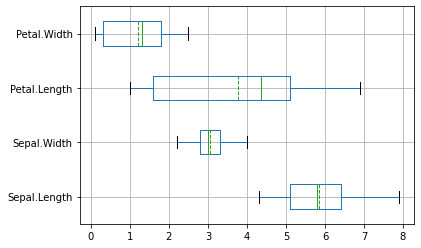

In [53]:
myBoxplot(data=iris, cols=list(iris.columns[:4]))

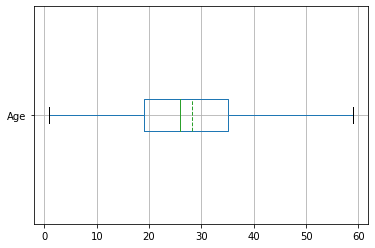

In [54]:
myBoxplot(data=titanic, cols='Age')

使用 **kwargs 比較有修改的彈性

In [55]:
def myBoxplot(data, cols, **kwargs) :
    data.boxplot(column=cols,
                 **kwargs)
    plt.show()

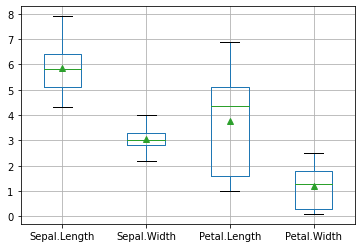

In [56]:
myBoxplot(data=iris, cols=list(iris.columns[:4]), 
          showmeans=True,
          meanline=False,
          showfliers=False)

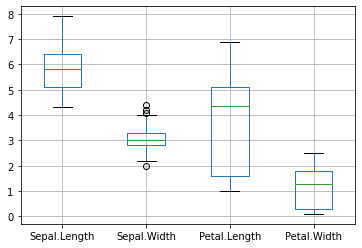

In [58]:
myBoxplot(data=iris, cols=list(iris.columns[:4]))

## <font color=#0000FF>遞迴函數(Recursive)</font>
1. 找出一般式(包括本層可處理的，以及本層無法處理的)，並且 return
2. 找出何時停止

---
1. $f(10)=10+9+8+...+3+2+1$
2. $f(10)=10+f(9)$
3. 一般式：$f(n)=n+f(n-1)$

In [59]:
def f1(n):
    if n <=1 :
        return n
    else:
        return n + f1(n-1)

In [60]:
f1(10)

55

$10*9+9*8+8*7+...+3*2$

In [61]:
def f2(n):
    if n <= 3:
        return n*(n-1)
    else:
        return n*(n-1) + f2(n-1)

In [62]:
f2(10)

328

## <font color=#0000FF>模組 (Module)與套件(Package)</font>
- [visual studio code 下載點](https://code.visualstudio.com/)

### module
#### 先利用Visual Studio存成.Py檔，再用jupyter notebook 讀進來使用<br>
以下是儲存的內容
```
# -*-coding:UTF-8-*- 
# from platform import python_version
# import os, time, glob, socket, sys

def myOper(x, y):
    a = x + y
    return a

def myOper2(x, y):
    a = x + y
    b = x - y
    c = x * y
    d = x / y
    return a, b, c, d
```

In [1]:
import mod01

In [4]:
mod01.myOper(3 ,4)

7

In [6]:
mod01.myOper2(3 ,4)

(7, -1, 12, 0.75)

#### 都利用Visual Studio（不使用jupyter notebook）<br>

```
# -*-coding:UTF-8-*- 
# from platform import python_version
# import os, time, glob, socket, sys

def myOper(x, y):
    print('from mod01.myOper():{}'.format(__name__))
    a = x + y
    return a

def myOper2(x, y):
    print('from mod01.myOper2():{}'.format(__name__))
    a = x + y
    b = x - y
    c = x * y
    d = x / y
    return a, b, c, d

def Amymain():
    

if __name__ == '__main__':
    Amymain()
```

- debug模式
    * 設定中斷點：暫停點的概念，一次只執行到標註到那點（不包含那行）
    * 使用時機：編譯過程沒有錯誤（可以執行），但執行結果是錯誤的
    * 執行時的按鈕
        1. Continued：繼續執行
        2. Step Over：不進入函數檢查，直接往下執行
        3. Step Into：進入函數檢查
        4. Stop Out：跳出函數

## <font color=#0000FF>【自行練習】 : 練習遞迴與檔案目錄，不可以使用glob模組</font>

### <font color=#0000FF>1. 請利用 <u>遞迴</u> 撰寫一個類似 glob 功能的函數，給定一個目錄(path)，以及想要尋找的附屬檔名(ext)，回傳一個list物件 </font>
- list recursiveFindFiles(path, ext, isFullName=False)
    - path : 給定的目錄名稱
    - ext : 附屬檔名
    - isFullName : 是否回傳全路徑的檔案名稱，或是僅需要檔案名稱(default)
    - return : 迴傳一個 list 物件，存放所有檔案名稱
- 【提示】可以使用 os 模組
    - os.listdir()
    - os.path.isfile() : 判斷是否為檔案
    - os.path.isdir() : 判斷是否為目錄
- 請執行以下兩個的結果
    - 需要全路徑的檔案名稱
        - lst = recursiveFindFiles(path=r'C:\data',ext='jpg',isFullName=True)
        - print(len(lst))
        - print(lst[0])
    - 不需要全路徑的檔案名稱    
        - lst = recursiveFindFiles(path=r'C:\data',ext='jpg',isFullName=False)
        - print(len(lst))
        - print(lst[0])

### <font color=#0000FF>2. 請利用 <u>遞迴</u> 撰寫一個函數，給定一個目錄名稱(path)與圖檔的附屬檔名(ext)，就可以直接回傳一個list物件，內存所有圖檔的numpy.ndarray </font>
- list recursiveFindImgFiles(path, ext)
    - path : 給定的目錄名稱
    - ext : 附屬檔名
    - return : 迴傳一個 list 物件，內存放所有影像檔案的numpy.ndarray   